In [30]:
import tensorflow as tf
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [2]:
a = tf.Variable(3, name='a')
b = tf.Variable(4, name='b')
f = tf.multiply(a, b)

In [3]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
    print(result)

12


## Train Test Split plus Scale

In [4]:
data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [5]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 13, name='hidden1', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, 1, activation=None)

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)
training_op = optimizer.minimize(loss)

In [6]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(100):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch+1, 'training loss', train_loss, 'test loss', test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 1 training loss 554.03 test loss 660.347
epoch 2 training loss 546.125 test loss 650.015
epoch 3 training loss 538.345 test loss 639.951
epoch 4 training loss 530.715 test loss 630.128
epoch 5 training loss 523.258 test loss 620.418
epoch 6 training loss 515.852 test loss 610.932
epoch 7 training loss 508.469 test loss 601.485
epoch 8 training loss 501.074 test loss 592.059
epoch 9 training loss 493.63 test loss 582.599
epoch 10 training loss 486.078 test loss 573.072
epoch 11 training loss 478.41 test loss 563.432
epoch 12 training loss 470.622 test loss 553.555
epoch 13 training loss 462.719 test loss 543.555
epoch 14 training loss 454.694 test loss 533.454
epoch 15 training loss 446.522 test loss 523.237
epoch 16 training loss 438.201 test loss 512.876
epoch 17 training loss 429.72 test loss 502.347
epoch 18 training loss 421.08 test loss 491.704
epoch 19 training loss 412.291 test loss 480.924
epoch 20 training loss 403.354 test loss 470.028
epoch 21 training loss 394.295 tes

In [7]:
pred

array([[ 36.91612625],
       [ 22.91326904],
       [ 29.00703812],
       [ 42.83797455],
       [ 31.58760643],
       [ 34.35962296],
       [ 37.6284256 ],
       [ 25.71767616],
       [ 12.26983547],
       [ 38.49637985],
       [ 12.13676548],
       [ 20.50205421],
       [ 28.50057602],
       [ 20.01791573],
       [ 21.5471859 ],
       [ 30.89517784],
       [ 25.99125862],
       [ 29.81637955],
       [ 12.47265625],
       [ 21.9564724 ],
       [ 22.21447754],
       [ 17.50271797],
       [ 20.00486374],
       [ 18.71997643],
       [ 28.09650612],
       [ 15.83062077],
       [ 19.50211716],
       [ 20.39822197],
       [ 19.14417267],
       [  6.69225264],
       [ 29.35415649],
       [  8.26340485],
       [ 24.61723328],
       [ 24.11224365],
       [ 12.37150288],
       [ 17.03974724],
       [ 36.50586319],
       [ 20.70164871],
       [ 35.28701019],
       [ 27.78705788],
       [ 16.18810844],
       [ 20.72973633],
       [  9.17477417],
       [ 11

In [8]:
r2_score(y_test[:, 0], pred[:, 0])

0.68085729461108702

# Binary Classification

In [9]:
data = load_boston()

target = data.target * -1 + 1
target = target.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(data.data, target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)
training_op = optimizer.minimize(loss)

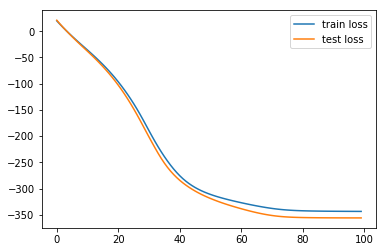

In [11]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,101))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

# Batches

In [12]:
from sklearn.model_selection import KFold
kf = KFold(4, shuffle=True, random_state=2003)

In [13]:
batches = []
for train,test in kf.split(X_train, y_train):
    batches.append(test)
len(batches)

4

In [14]:
kf = KFold(4, shuffle=True, random_state=2003)

batches = [test for _,test in kf.split(X_train, y_train)]

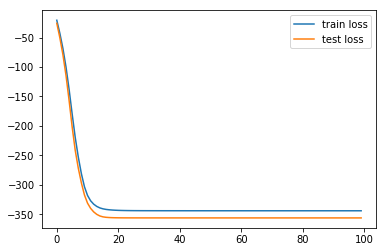

In [15]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,101))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

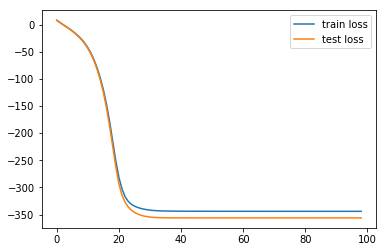

In [16]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
y_hat = tf.layers.dense(h3, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.001)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,100))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

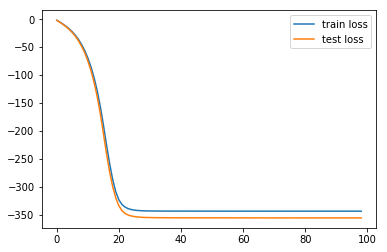

In [17]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
y_hat = tf.layers.dense(h3, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.001)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,100))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [26]:
pred = (pred > .5).astype(int)
pred = pred > .5
pred = pred.astype(int)
pred = sess.run(y_hat, feed_dict={X: X_test})

RuntimeError: Attempted to use a closed Session.

In [25]:
accuracy_score(y_test, pred)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

# MultiClass classification

In [31]:
data = load_iris()
y = to_categorical(data.target)

X_train, X_test, y_train, y_test = train_test_split(data.data, y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [32]:
y.shape

(150, 3)

In [42]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 4, activation=tf.nn.relu, name='hidden1')
y_hat = tf.layers.dense(h1, y_train.shape[1], name='y_hat', activation=None)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)
training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [43]:
# run network
init =tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(5):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        print('epoch', epoch, 'train loss', train_loss)
        
    saver.save(sess, './iris.ckpt')

epoch 0 train loss 1.09108
epoch 1 train loss 1.06377
epoch 2 train loss 1.03836
epoch 3 train loss 1.01374
epoch 4 train loss 0.989302


In [44]:
with tf.Session() as sess:
    saver.restore(sess, './iris.ckpt')
    pred = sess.run(y_hat, feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./iris.ckpt


In [45]:
pred

array([[-0.42484838, -0.530779  , -1.33029354],
       [-0.10002677, -0.2883715 ,  0.21246204],
       [ 0.60566342, -0.41805366,  0.64728212],
       [ 0.04481427, -0.26699704,  0.30125308],
       [-0.42116523, -0.50837427,  0.26334566],
       [-0.15427546, -0.0119939 , -0.02512614],
       [-1.3771342 , -1.49117792, -1.5794282 ],
       [-0.13419639, -0.03814258, -0.25936621],
       [-0.37685841, -0.49296814, -1.23437142],
       [-0.25792056, -0.23982644, -0.70032978],
       [-0.56446558, -0.3549501 ,  0.11583135],
       [ 0.01661156, -0.95185435,  0.98375046],
       [ 0.37092793, -0.54962409,  0.6993438 ],
       [-0.98208094, -1.10634625, -1.2761538 ],
       [ 0.16934429, -0.66247749,  0.74391603],
       [ 0.59981453, -0.46708083,  0.69482005],
       [ 0.35038286, -0.51557219,  0.65784299],
       [-0.30456597, -0.27828985, -0.27796543],
       [-1.37539828, -1.21293032, -1.18462789],
       [-0.04713823,  0.04936159, -0.05020651],
       [-0.19771115, -0.31492168, -0.807